In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

In [60]:
df_sales = pd.read_csv (r'D:\KURSUS DATA ANALYST\pert 9\New folder\SalesTransactionv4a.csv')

In [61]:
df_sales.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


# Data Cleansing

In [62]:
# 1. Ubah kolom Date menjadi tipe datetime
df_sales['Date']= pd.to_datetime(df_sales['Date'])

# 2. Buang semua transaksi yang memiliki quantity negative atau yang TransactionNo diawali dengan C
df_sales = df_sales[df_sales['TransactionNo'].str[0]!='C']

In [63]:
# 3. cek type data
print(df_sales.dtypes)

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo              float64
Country                  object
dtype: object


In [64]:
# 4.Identifikasi nilai null
null_counts = df_sales.isnull().sum()
print("Jumlah nilai null per kolom:")
print(null_counts[null_counts > 0])

Jumlah nilai null per kolom:
CustomerNo    1
dtype: int64


In [65]:
# 5. Handling Missing Values
df_sales=df_sales.copy()
df_sales['CustomerNo'] = df_sales['CustomerNo'].fillna(0) # mengganti nilai null pada customerNo dengan nilai 0

null_counts = df_sales.isnull().sum()
print("Jumlah nilai null per kolom:")
print(null_counts[null_counts > 0])

Jumlah nilai null per kolom:
Series([], dtype: int64)


# Data Oveview

In [66]:
# Menghitung jumlah pesanan
total_transaksi = df_sales['TransactionNo'].nunique()

# Menghitung jumlah pelanggan unik
total_customers = df_sales['CustomerNo'].nunique()

#menghitung jumlah produk
total_produk = df_sales['ProductNo'].nunique()

print(f"Jumlah pesanan         : {total_transaksi}")
print(f"Jumlah pelanggan unik  : {total_customers}")
print(f"Jumlah produk :{total_produk}")

Jumlah pesanan         : 19790
Jumlah pelanggan unik  : 4719
Jumlah produk :3753


In [67]:
# Handle outliers - remove negative price/quantity
df_sales = df_sales[(df_sales['Price'] > 0) & (df_sales['Quantity'] > 0)]

# penambahan kolom bantu
df_sales['Revenue'] = df_sales['Price'] * df_sales['Quantity']
df_sales['Year'] = df_sales['Date'].dt.year
df_sales['Month'] = df_sales['Date'].dt.month
df_sales['Month_Name'] = df_sales['Date'].dt.month_name()
df_sales['Quarter'] = df_sales['Date'].dt.quarter

In [68]:
df_sales.head(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue,Year,Month,Month_Name,Quarter
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019,12,December,4
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019,12,December,4
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019,12,December,4


# Analisis Deskripsi

## Analisis Tren Penjualan Bulanan

In [69]:
# Filter data antara 1 Jan 2019 sampai 30 Nov 2019
df_filtered_2019 = df_sales[(df_sales['Date'] >= '2019-01-01') & (df_sales['Date'] <= '2019-11-30')].copy()

# Buat kolom YearMonth
df_filtered_2019['YearMonth'] = df_filtered_2019['Date'].dt.to_period('M')

In [70]:
# mengecek tanggal awal, tanggal akhir, dan durasi
start_date = df_filtered_2019['Date'].min() # tanggal awal
end_date = df_filtered_2019['Date'].max() # tanggal akhir
duration_days = (end_date - start_date).days # Durasi waktu

print(f"Tanggal awal  : {start_date.date()}")
print(f"Tanggal akhir : {end_date.date()}")
print(f"Durasi data   : {duration_days} hari")

Tanggal awal  : 2019-01-04
Tanggal akhir : 2019-11-30
Durasi data   : 330 hari


In [71]:
# Hitung total sales (Revenue) per bulan
monthly_revenue = df_filtered_2019.groupby('YearMonth').agg({'Revenue': 'sum'}).reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].dt.to_timestamp()

In [72]:
print(monthly_revenue)

    YearMonth     Revenue
0  2019-01-01  4559856.37
1  2019-02-01  3335017.18
2  2019-03-01  4398401.60
3  2019-04-01  3589497.88
4  2019-05-01  4578965.08
5  2019-06-01  4494730.81
6  2019-07-01  4593867.06
7  2019-08-01  4758356.02
8  2019-09-01  6628303.06
9  2019-10-01  7237417.36
10 2019-11-01  7861197.12


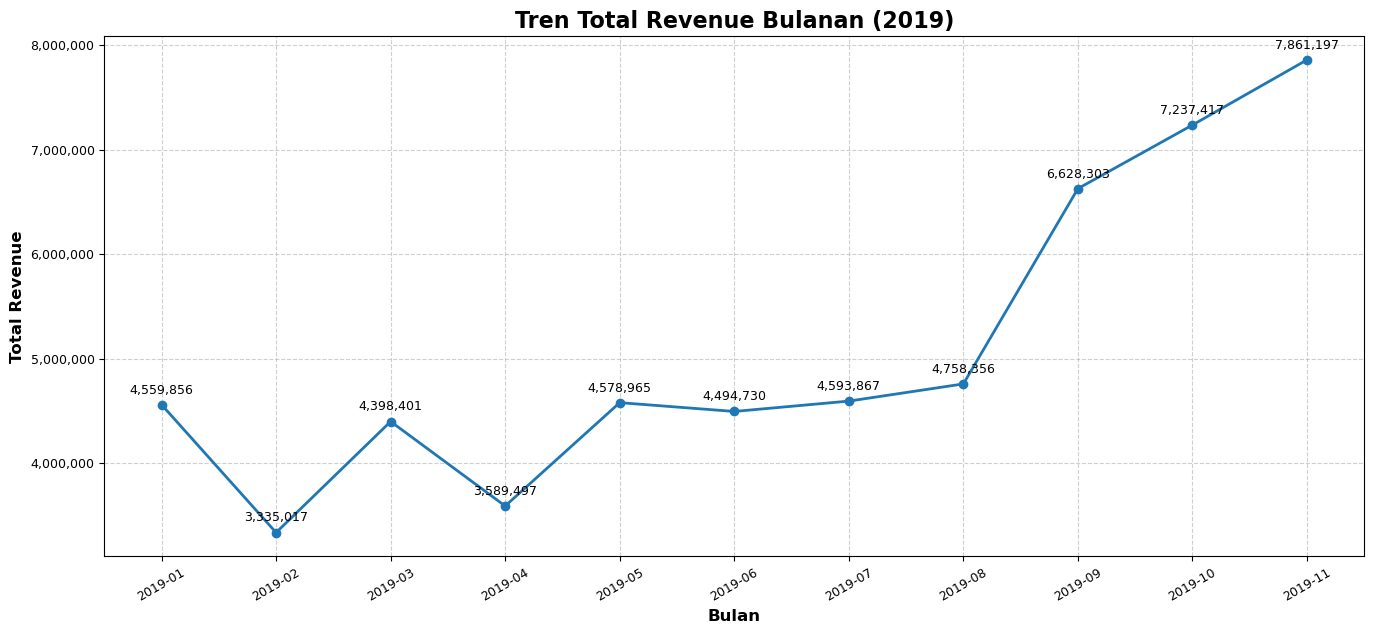

In [74]:
# Buat data tren revenue bulanan
monthly_revenue = df_filtered_2019.groupby('YearMonth').agg({'Revenue': 'sum'}).reset_index()
x = np.arange(len(monthly_revenue))  # posisi numerik untuk X
y = monthly_revenue['Revenue'].values
labels = monthly_revenue['YearMonth'].astype(str).values  

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(x, y, marker='o', linewidth=2, color='tab:blue')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, fontsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_title('Tren Total Revenue Bulanan (2019)', fontsize=16, fontweight='bold')
ax.set_xlabel('Bulan', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Revenue', fontsize=12, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)

# Tambahkan nilai di atas setiap titik
max_val = y.max() if len(y) else 0
for i, v in enumerate(y):
    ax.text(i, v + max_val*0.01, f"{int(v):,}", ha='center', va='bottom', fontsize=9)
fig.subplots_adjust(bottom=0.25, left=0.08, right=0.98, top=0.9)
fig.savefig('trend_revenue_bulanan_2019.png', facecolor='white', transparent=False)
plt.show()

##### Temuan :
- Feb 2019: turun ke 3.35 juta (turun ~26% dari Januari).
- Apr 2019: kembali turun ke 3.58 juta.
- Setelah Agustus → naik sangat tajam hingga 7.86 juta di November.

## Analisis Penyebab turun/naik nya Revenue Perbulan

### 1. Apakah Penurunan/kenaikan Revenue di pengaruhi oleh jumlah pesanan ?

#### 1.a Jumlah Transaksi Setiap bulan

In [75]:
# menghitung Jumlah Transaksi Setiap bulan
monthly_transactions = df_filtered_2019.groupby('YearMonth')['TransactionNo'].nunique()
monthly_transactions

YearMonth
2019-01    1081
2019-02    1096
2019-03    1442
2019-04    1235
2019-05    1670
2019-06    1528
2019-07    1452
2019-08    1341
2019-09    1818
2019-10    2005
2019-11    2753
Freq: M, Name: TransactionNo, dtype: int64

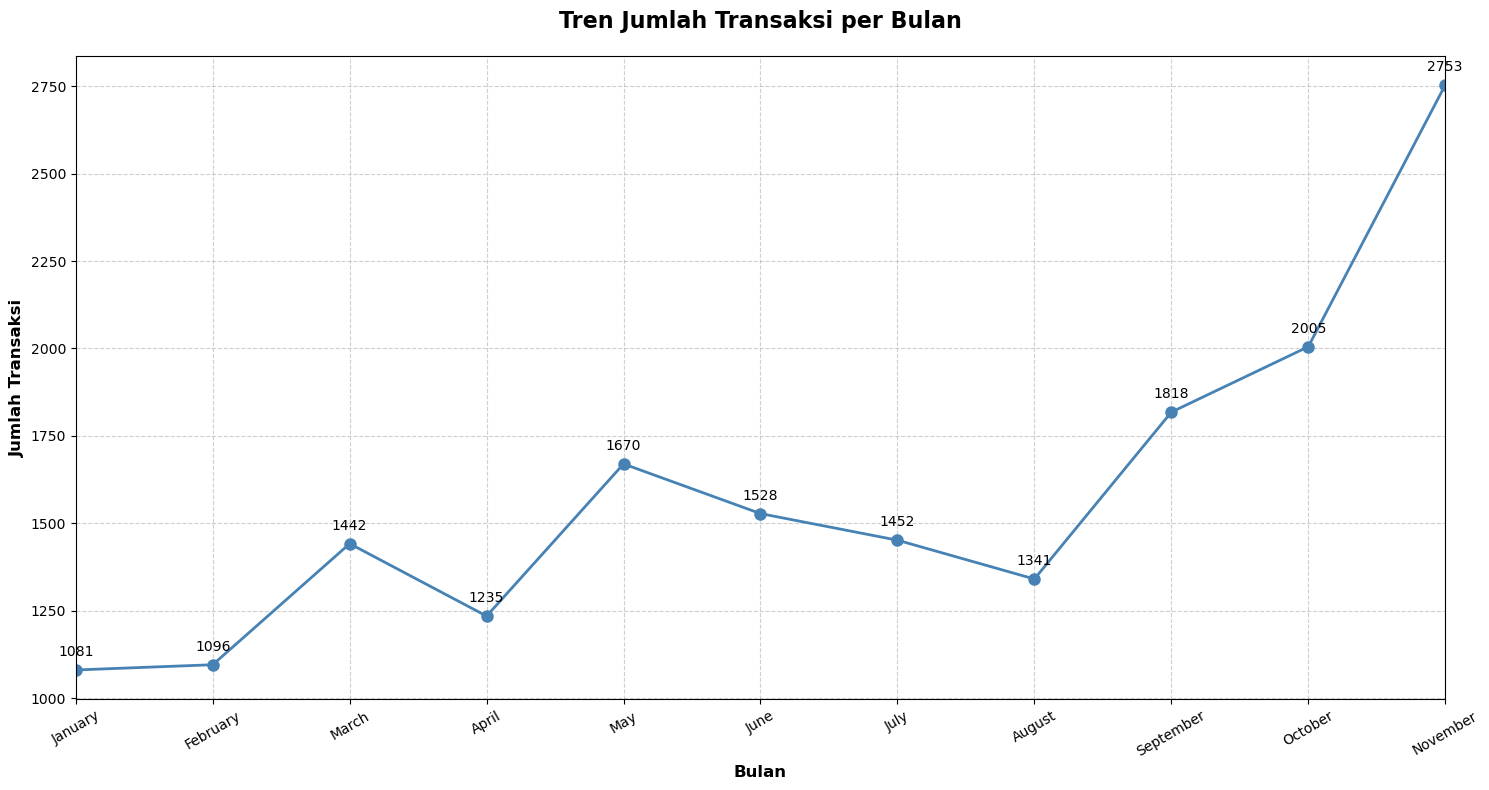

In [76]:
# Konversi index ke datetime
monthly_transactions.index = monthly_transactions.index.to_timestamp()
monthly_transactions.index = pd.to_datetime(monthly_transactions.index)

# visualisasi Plot tren jumlah transaksi perbulan
plt.figure(figsize=(15, 8))
monthly_transactions.plot(kind='line', marker='o', linewidth=2, markersize=8, color='steelblue')
plt.title('Tren Jumlah Transaksi per Bulan', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Bulan', fontsize=12,fontweight='bold')
plt.ylabel('Jumlah Transaksi', fontsize=12,fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(monthly_transactions.index, [date.strftime('%B') for date in monthly_transactions.index], rotation=30)
plt.margins(x=1)
# Menambahkan nilai 
for x, y in zip(monthly_transactions.index, monthly_transactions.values):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('trend jumlah transaksi bulanan .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

#### 1.b Average Order Value (AOV)
AOV adalah nilai uang rata-rata yang dibelanjakan setiap kali seorang pelanggan melakukan pembelian (transaksi).

In [77]:
# Hitung Total Revenue dan Jumlah Transaksi per Bulan
monthly_data = df_filtered_2019.groupby('YearMonth').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Transactions=('TransactionNo', 'nunique')).reset_index()

# Konversi YearMonth ke string untuk menghindari error plotting
monthly_data['YearMonth_Str'] = monthly_data['YearMonth'].astype(str)

# Hitung AOV (Average Order Value)
monthly_data['AOV'] = monthly_data['Total_Revenue'] / monthly_data['Total_Transactions']

monthly_data[['YearMonth', 'Total_Revenue', 'Total_Transactions', 'AOV']].round(2)

,YearMonth,Total_Revenue,Total_Transactions,AOV
0,2019-01,4559856.37,1081,4218.18
1,2019-02,3335017.18,1096,3042.90
2,2019-03,4398401.60,1442,3050.21
3,2019-04,3589497.88,1235,2906.48
4,2019-05,4578965.08,1670,2741.90
5,2019-06,4494730.81,1528,2941.58
6,2019-07,4593867.06,1452,3163.82
7,2019-08,4758356.02,1341,3548.36
8,2019-09,6628303.06,1818,3645.93
9,2019-10,7237417.36,2005,3609.68


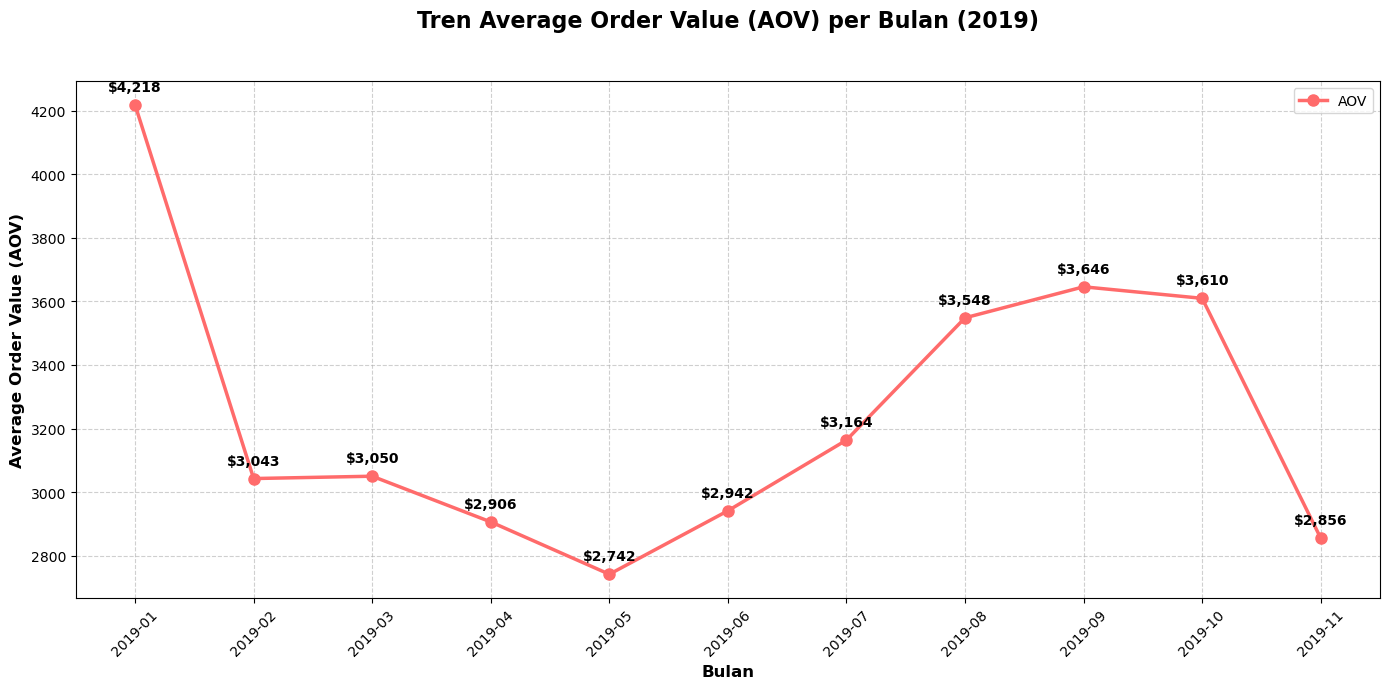

In [78]:
# visualisasi plot AOV (avarage order value)
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['YearMonth_Str'], monthly_data['AOV'], 
         marker='o', linewidth=2.5, markersize=8, color='#FF6B6B', label='AOV')
plt.title('Tren Average Order Value (AOV) per Bulan (2019)\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Bulan', fontsize=12, fontweight='bold')
plt.ylabel('Average Order Value (AOV)', fontsize=12,fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
for i, (ym, aov) in enumerate(zip(monthly_data['YearMonth_Str'], monthly_data['AOV'])):
    plt.annotate(f'${aov:,.0f}', 
                 (i, aov), textcoords="offset points", xytext=(0,10), ha='center', 
                 fontsize=10, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('trend aov .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

#### 1.c Perbandingan Jumlah Transaksi dengan AOV (average order value)

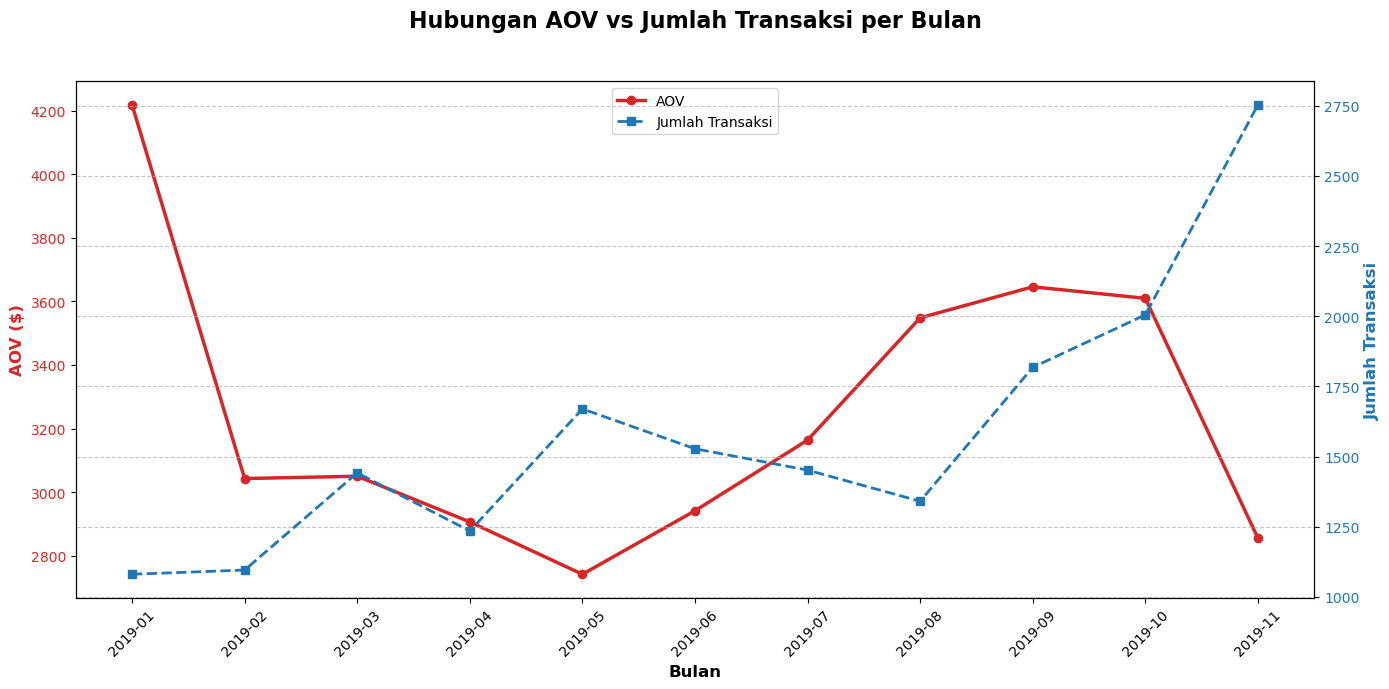

In [79]:
# visualisasi 2 axis
fig, ax1 = plt.subplots(figsize=(14, 7))
x_pos = np.arange(len(monthly_data))

# Plot AOV
color = 'tab:red'
ax1.set_xlabel('Bulan', fontsize=12,fontweight='bold')
ax1.set_ylabel('AOV ($)', color=color, fontsize=12,fontweight='bold')
line1 = ax1.plot(x_pos, monthly_data['AOV'], 
                 color=color, marker='o', linewidth=2.5, label='AOV')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(monthly_data['YearMonth_Str'], rotation=45)

# Plot Jumlah Transaksi di axis kedua
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Jumlah Transaksi', color=color, fontsize=12,fontweight='bold')
line2 = ax2.plot(x_pos, monthly_data['Total_Transactions'], 
                 color=color, marker='s', linestyle='--', linewidth=2, label='Jumlah Transaksi')
ax2.tick_params(axis='y', labelcolor=color)

# Gabungkan legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center')

plt.title('Hubungan AOV vs Jumlah Transaksi per Bulan\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.savefig('hubungan aov transaksi .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

In [80]:
# Hitung pertumbuhan AOV
monthly_data['AOV_Growth'] = monthly_data['AOV'].pct_change() * 100

# Analisis performa
print("=== ANALISIS AOV ===")
print(f"AOV Rata-rata: ${monthly_data['AOV'].mean():.2f}")
print(f"AOV Tertinggi: ${monthly_data['AOV'].max():.2f} ({monthly_data.loc[monthly_data['AOV'].idxmax(), 'YearMonth_Str']})")
print(f"AOV Terendah: ${monthly_data['AOV'].min():.2f} ({monthly_data.loc[monthly_data['AOV'].idxmin(), 'YearMonth_Str']})")

print("\nBulan dengan Pertumbuhan AOV Tertinggi:")
growth_top = monthly_data.nlargest(3, 'AOV_Growth')[['YearMonth_Str', 'AOV', 'AOV_Growth']]
print(growth_top.round(2))

print("\nBulan dengan Penurunan AOV Terbesar:")
growth_bottom = monthly_data.nsmallest(3, 'AOV_Growth')[['YearMonth_Str', 'AOV', 'AOV_Growth']]
print(growth_bottom.round(2))
plt.show()


=== ANALISIS AOV ===
AOV Rata-rata: $3247.69
AOV Tertinggi: $4218.18 (2019-01)
AOV Terendah: $2741.90 (2019-05)

Bulan dengan Pertumbuhan AOV Tertinggi:
  YearMonth_Str      AOV  AOV_Growth
7       2019-08  3548.36       12.15
6       2019-07  3163.82        7.56
5       2019-06  2941.58        7.28

Bulan dengan Penurunan AOV Terbesar:
   YearMonth_Str     AOV  AOV_Growth
1        2019-02  3042.9      -27.86
10       2019-11  2855.5      -20.89
4        2019-05  2741.9       -5.66


1. Februari – AOV Turun Tajam, Transaksi Naik
Jumlah transaksi naik, tapi AOV anjlok.
Revenue bulan ini jadi lebih rendah meski volume transaksi naik.
Artinya: yang belanja lebih banyak pelanggan “kecil” dengan keranjang belanja lebih kecil.

2. November – Transaksi Melejit, AOV Turun
Jumlah transaksi melonjak paling tinggi (~2750), tapi AOV turun drastis (balik ke ~3000).
Revenue tetap tertinggi karena volume transaksi menutupi turunnya nilai rata-rata per order.
Artinya: banyak pelanggan baru berbelanja tapi dengan keranjang lebih kecil.
Ini pola klasik “promo massal” (misalnya diskon besar, festival belanja → banyak pembelian kecil-kecil).

Insight Bisnis
- Awal tahun → lebih bergantung pada pelanggan besar (AOV tinggi tapi sedikit transaksi).
- Pertengahan tahun → stabil tapi kurang pertumbuhan → butuh trigger (campaign/produk baru).
- Akhir tahun (Sep–Nov) → pertumbuhan pesat didorong oleh kombinasi pelanggan lama + pelanggan baru.
- September–Oktober → pertumbuhan sehat (volume + AOV naik).
- November → pertumbuhan massal, tapi profit per transaksi turun.

#### 1.d Basket Size Analisis

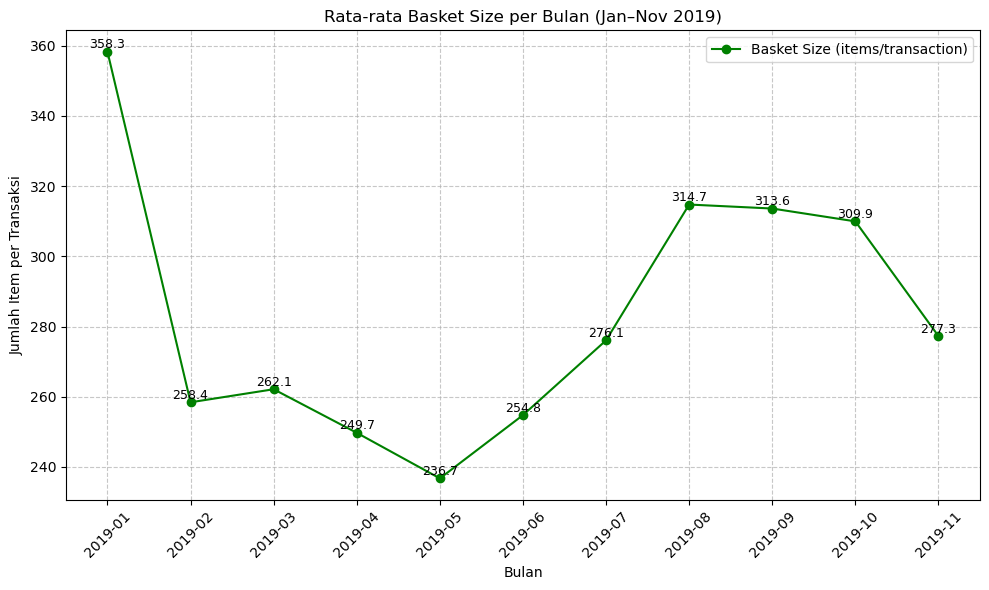

In [81]:
# 3. Hitung jumlah item (Quantity) per transaksi
basket_per_tx = df_filtered_2019.groupby(['YearMonth','TransactionNo'])['Quantity'].sum()

# 4. Hitung rata-rata basket size per bulan
monthly_basket_size = basket_per_tx.groupby('YearMonth').mean()

# 5. Visualisasi basket size per bulan
plt.figure(figsize=(10,6))
plt.plot(monthly_basket_size.index.astype(str), monthly_basket_size,
         marker='o', color='green', label='Basket Size (items/transaction)')
# Tambahkan nilai di atas titik
for i, val in enumerate(monthly_basket_size):
    plt.text(x=i, 
             y=val+0.1,                
             s=f'{val:.1f}',
             ha='center', va='bottom', 
             fontsize=9, color='black')
plt.title('Rata-rata Basket Size per Bulan (Jan–Nov 2019)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Item per Transaksi')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

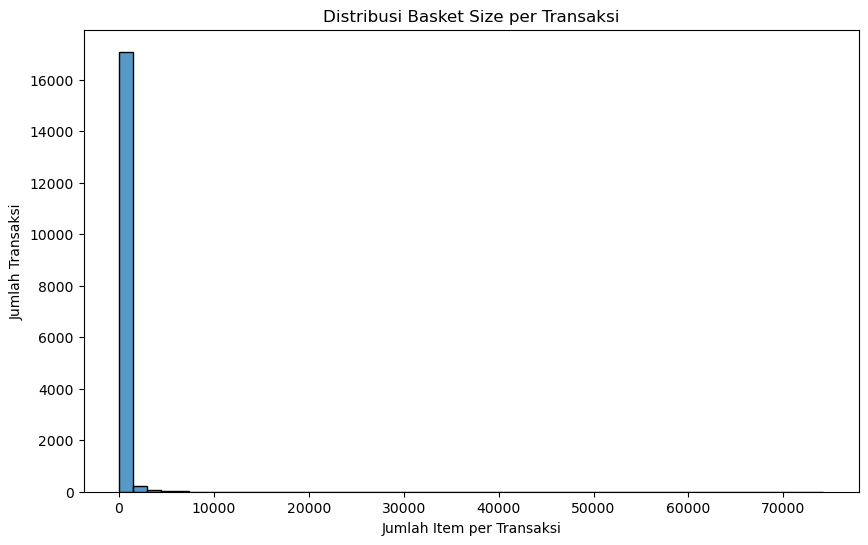

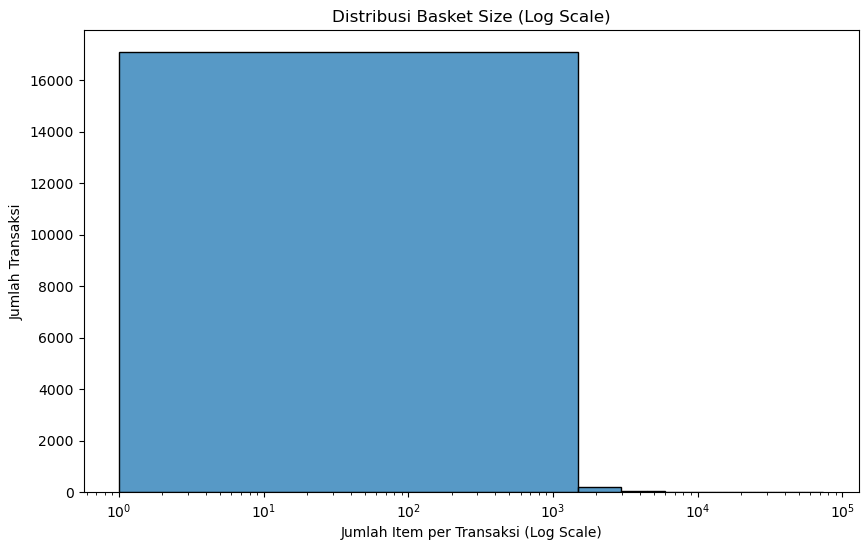

count    17421.000000
mean       282.382297
std        805.631209
min          1.000000
25%         72.000000
50%        158.000000
75%        306.000000
max      74215.000000
Name: Quantity, dtype: float64


In [82]:
# Hitung total quantity per transaction
basket_size = df_filtered_2019.groupby('TransactionNo')['Quantity'].sum()

# Plot histogram 
plt.figure(figsize=(10,6))
sns.histplot(basket_size, bins=50, kde=False)
plt.title('Distribusi Basket Size per Transaksi')
plt.xlabel('Jumlah Item per Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

# Plot histogram log-scale (untuk melihat outlier)
plt.figure(figsize=(10,6))
sns.histplot(basket_size, bins=50, kde=False)
plt.xscale('log')
plt.title('Distribusi Basket Size (Log Scale)')
plt.xlabel('Jumlah Item per Transaksi (Log Scale)')
plt.ylabel('Jumlah Transaksi')
plt.show()

# Cek ringkasan statistik
print(basket_size.describe())

menggunakan nilai rata-rata kurang representatif, karena terapat outlier jumlah item pertransaksi yang sangat banyak. oleh karena itu, kita akan menggunakan nilai media sebagai representatif dari nilai basket size.

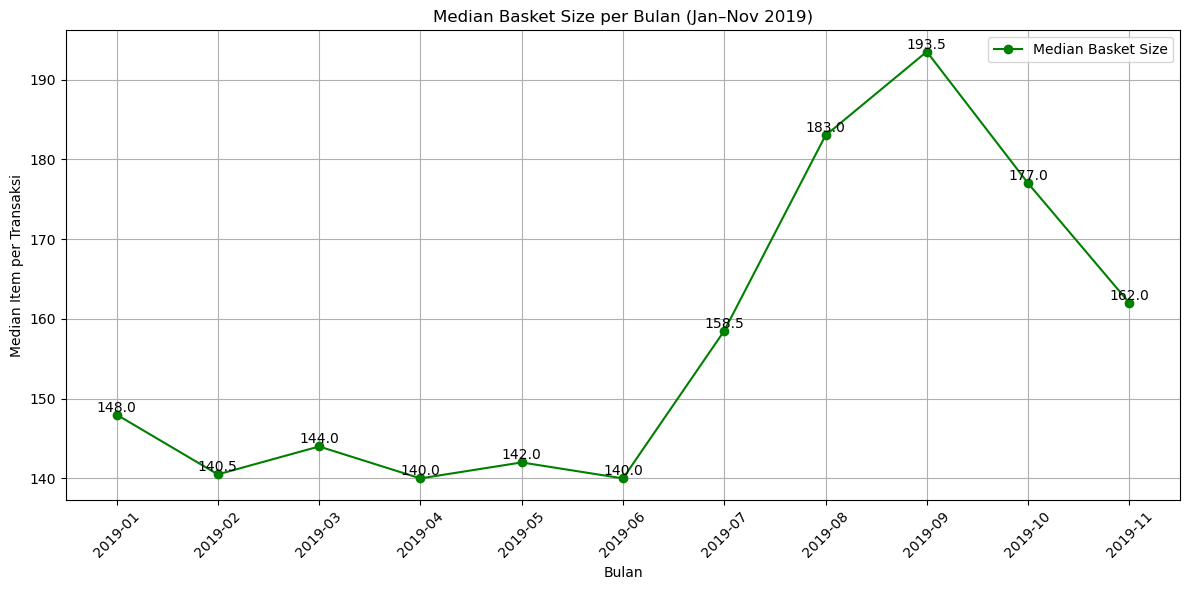

In [83]:
# Hitung basket size per transaksi (jumlah item per transaksi)
basket_per_trans = df_filtered_2019.groupby(['YearMonth','TransactionNo'])['Quantity'].sum().reset_index()

# Hitung median basket size tiap bulan
median_basket_monthly = basket_per_trans.groupby('YearMonth')['Quantity'].median()

# Plot median basket size per bulan
plt.figure(figsize=(12,6))
plt.plot(median_basket_monthly.index.astype(str), median_basket_monthly.values,
         marker='o', color='green', label='Median Basket Size')

# Tambahkan nilai di atas titiknya
for x, y in zip(median_basket_monthly.index.astype(str), median_basket_monthly.values):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom')

plt.title('Median Basket Size per Bulan (Jan–Nov 2019)')
plt.xlabel('Bulan')
plt.ylabel('Median Item per Transaksi')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('media basket size .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

- Median basket size berada pada rentang 140–190 item/transaksi, menunjukkan gambaran pembelian normal customer grosir.
- Stabil di awal tahun (Jan–Jun) sekitar 140 item/transaksi.
- Naik signifikan pada Jul–Sep hingga 193 item/transaksi – kemungkinan dipengaruhi musim tertentu atau promo bulk purchase.
- Turun kembali di Oktober–November ke level 162 item/transaksi.

### 2. Apakah adanya kenaikan/penurunan di sebabkan oleh penjualan produk tertentu ?

##### 2.1 Top 5 Produk dengan kontribusi revenue terbesar

In [22]:
df_filtered_2019['YearMonth'] = df_filtered_2019['YearMonth'].astype(str)

# Hitung revenue per bulan per produk
monthly_product_sales = (df_filtered_2019.groupby([df_filtered_2019['YearMonth'], 'ProductName'])['Revenue']
      .sum().reset_index().rename(columns={'Revenue': 'ProductRevenue'}))

# Total revenue per bulan
monthly_total = (df_filtered_2019.groupby('YearMonth')['Revenue'].sum().reset_index()
                .rename(columns={'Revenue': 'TotalRevenue'}))
# gabungkan data
monthly_product_sales = monthly_product_sales.merge(
    monthly_total, on='YearMonth', how='left')

In [23]:
# Hitung kontribusi produk terhadap revenue (%)
monthly_product_sales['RevenueShare'] = (
    monthly_product_sales['ProductRevenue'] / monthly_product_sales['TotalRevenue'] * 100)

# Ambil Top 5 produk per bulan
top_products_per_month = (monthly_product_sales.sort_values(['YearMonth','ProductRevenue'], ascending=[True,False]).groupby('YearMonth').head(5))

top_products_per_month.head().round(2)

,YearMonth,ProductName,ProductRevenue,TotalRevenue,RevenueShare
1300,2019-01,Medium Ceramic Top Storage Jar,840113.80,4559856.37,18.42
582,2019-01,Cream Hanging Heart T-Light Holder,72435.48,4559856.37,1.59
764,2019-01,Fairy Cake Flannel Assorted Colour,40305.46,4559856.37,0.88
1494,2019-01,Pack Of 72 Retrospot Cake Cases,36675.67,4559856.37,0.80
1069,2019-01,Heart Of Wicker Small,35279.08,4559856.37,0.77


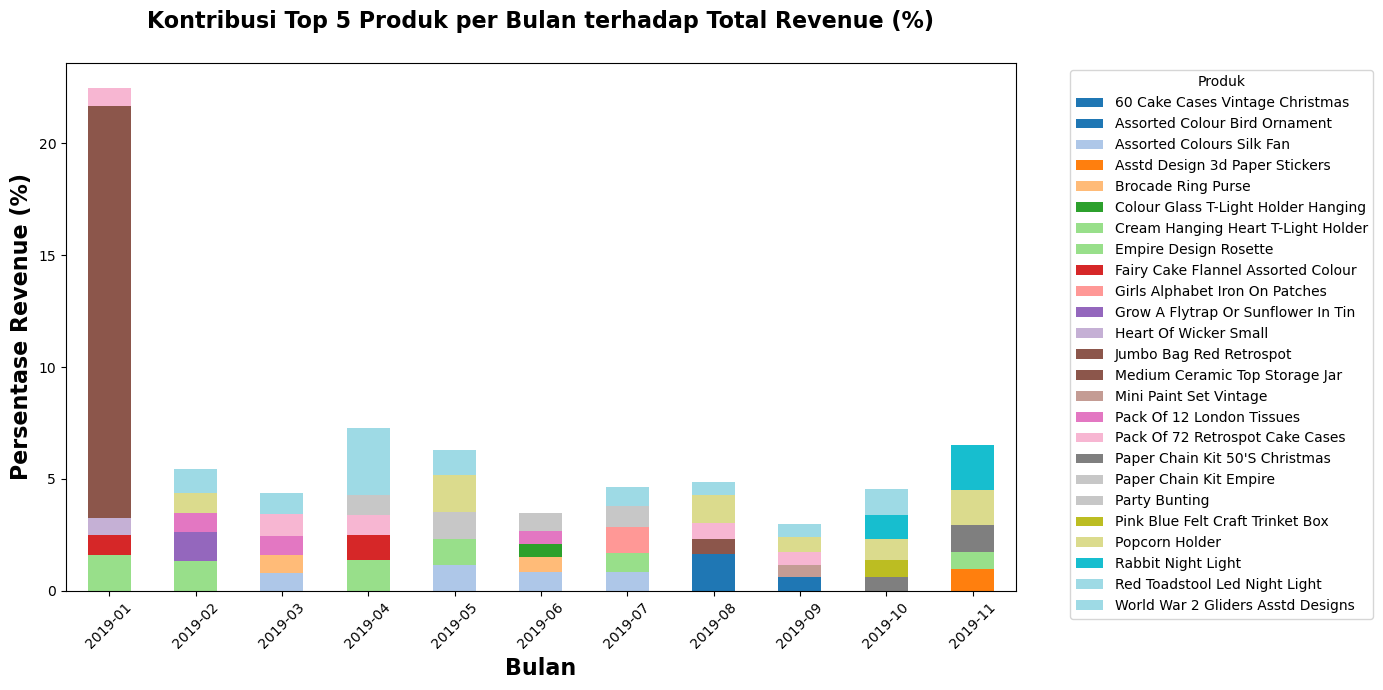

In [24]:
# visualisasi 
# Pivot data
pivot_top_products = top_products_per_month.pivot_table(index='YearMonth',
    columns='ProductName',values='RevenueShare',aggfunc='sum').fillna(0)

# Plot stacked bar
pivot_top_products.plot( kind='bar', stacked=True, figsize=(14,7), colormap='tab20')

plt.title("Kontribusi Top 5 Produk per Bulan terhadap Total Revenue (%)\n",fontsize=16, fontweight='bold')
plt.ylabel("Persentase Revenue (%)",fontsize=16, fontweight='bold')
plt.xlabel("Bulan",fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Produk", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top 5 produk .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

#### 2.b Trend top 3 produk Revenue terbesar (2019)

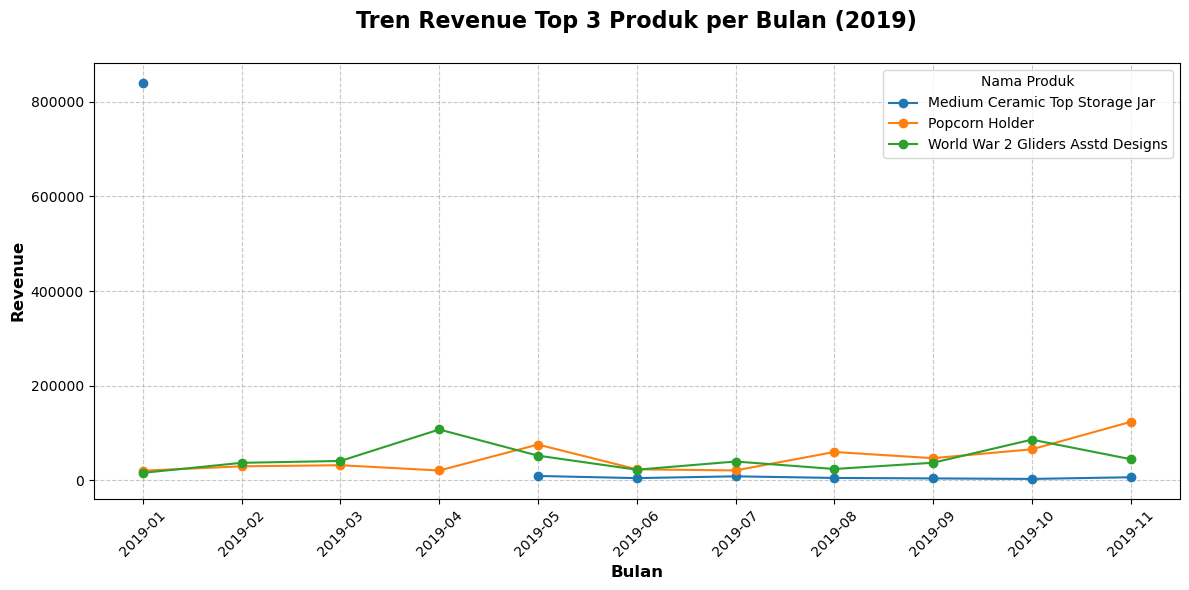

In [25]:
# Hitung total revenue per produk tahun 2019
top_products = (df_filtered_2019.groupby("ProductName")["Revenue"].sum().sort_values(ascending=False).head(3).index)

# Filter hanya produk top 3
df_top_products = df_filtered_2019[df_filtered_2019["ProductName"].isin(top_products)]

# Agregasi revenue per produk per bulan
monthly_top_products = (df_top_products.groupby(["YearMonth", "ProductName"])["Revenue"].sum().reset_index())

# Pivot untuk membuat line chart
pivot_top_products = monthly_top_products.pivot(index="YearMonth", columns="ProductName", values="Revenue")

# Plot line chart
plt.figure(figsize=(12,6))
for col in pivot_top_products.columns:
    plt.plot(pivot_top_products.index, pivot_top_products[col], marker="o", label=col)

plt.title("Tren Revenue Top 3 Produk per Bulan (2019)\n",fontsize=16, fontweight='bold')
plt.xlabel("Bulan",fontsize=12, fontweight='bold')
plt.ylabel("Revenue",fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Nama Produk")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig('top 3 produk .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

- Revenue Februari turun → karena ketergantungan terhadap 1 produk di Januari, lalu produk itu tidak sustain.
- Revenue Q4 naik → didorong oleh produk seasonal (tinggi peminat), yang meningkatkan kontribusi signifikan terhadap total penjualan.

### 3. Revenue per bulan setiap negara

In [26]:
# 1 Hitung revenue per bulan per negara
monthly_country_sales = (
    df_filtered_2019.groupby(["YearMonth", "Country"])["Revenue"].sum().reset_index())

In [27]:
# 2 Top 5 negara dengan kontribusi revenue terbesar sepanjang 2019
top_countries = (
    df_filtered_2019.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(5).index)
df_top_countries = monthly_country_sales[monthly_country_sales["Country"].isin(top_countries)]

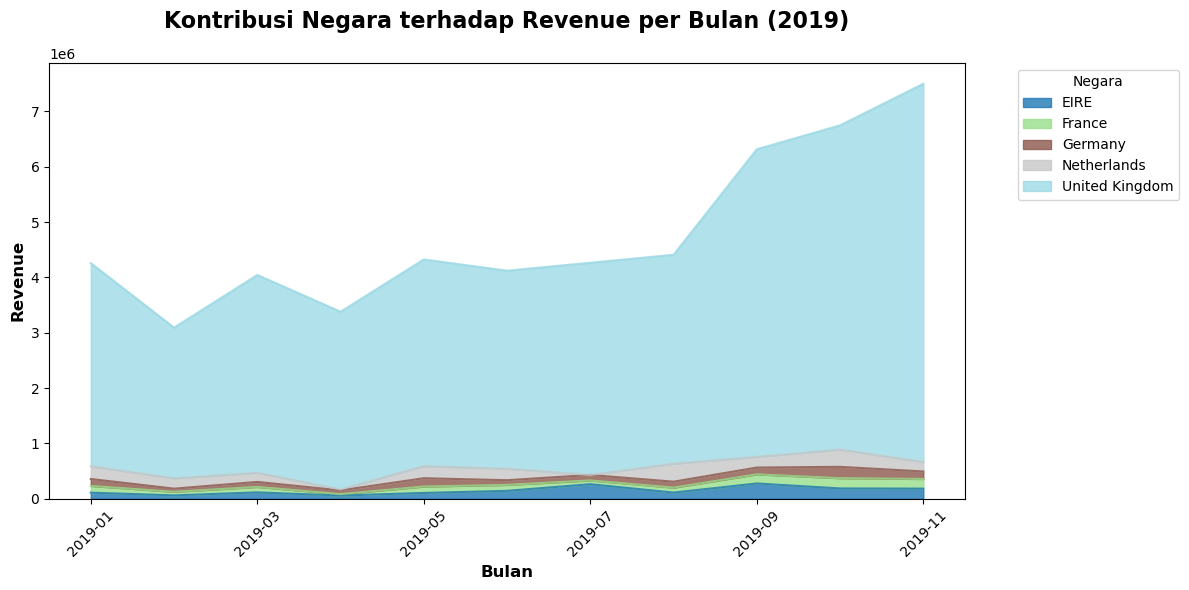

In [28]:
pivot_country = df_top_countries.pivot(index="YearMonth", columns="Country", values="Revenue").fillna(0)

# Stacked area chart
pivot_country.plot(
    kind="area",
    stacked=True,
    figsize=(12,6),
    alpha=0.8,
    cmap="tab20")

plt.title("Kontribusi Negara terhadap Revenue per Bulan (2019)\n",fontsize=16, fontweight='bold')
plt.xlabel("Bulan",fontsize=12, fontweight='bold')
plt.ylabel("Revenue",fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Negara", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig('kontribusi negara .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

1. Dominasi United Kingdom
- Revenue sangat didominasi oleh United Kingdom (UK) sepanjang tahun.
- Negara lain (EIRE, France, Germany, Netherlands) kontribusinya relatif kecil dibandingkan UK.
- fluktuasi revenue bulanan terutama dipengaruhi oleh pasar UK.

Kesimpulan :
Penurunan Februari  karena melemahnya penjualan di UK.
Lonjakan Q4 terutama ditopang oleh pasar UK, kemungkinan besar didorong oleh seasonality (holiday sales) atau kampanye marketing lokal.

## Customer Segmentation

#### 1. Mencari  customer dengan kontribusi terbesar terhadap revenue
Hitung total revenue per customer kemudian mengurutkan dari yang terbesar untuk melihat siapa yang paling berkontribusi
dengan menggunakan prinsip Pareto (80/20 effect)

In [29]:
# Hitung total revenue per customer
customer_revenue = (
    df_filtered_2019.groupby("CustomerNo")["Revenue"]
    .sum().reset_index().sort_values(by="Revenue", ascending=False))

# Tambahkan kontribusi % ke total revenue
customer_revenue["RevenueShare"] = customer_revenue["Revenue"] / customer_revenue["Revenue"].sum()

customer_revenue.head(10).round(2)  # lihat top 10 customer

,CustomerNo,Revenue,RevenueShare
1811,14646.0,1987161.47,0.04
119,12415.0,900545.54,0.02
3919,17450.0,876089.03,0.02
2008,14911.0,848129.50,0.02
61,12346.0,840113.80,0.01
4388,18102.0,782084.17,0.01
1450,14156.0,678773.66,0.01
1097,13694.0,588479.10,0.01
1559,14298.0,578125.25,0.01
3962,17511.0,520883.22,0.01


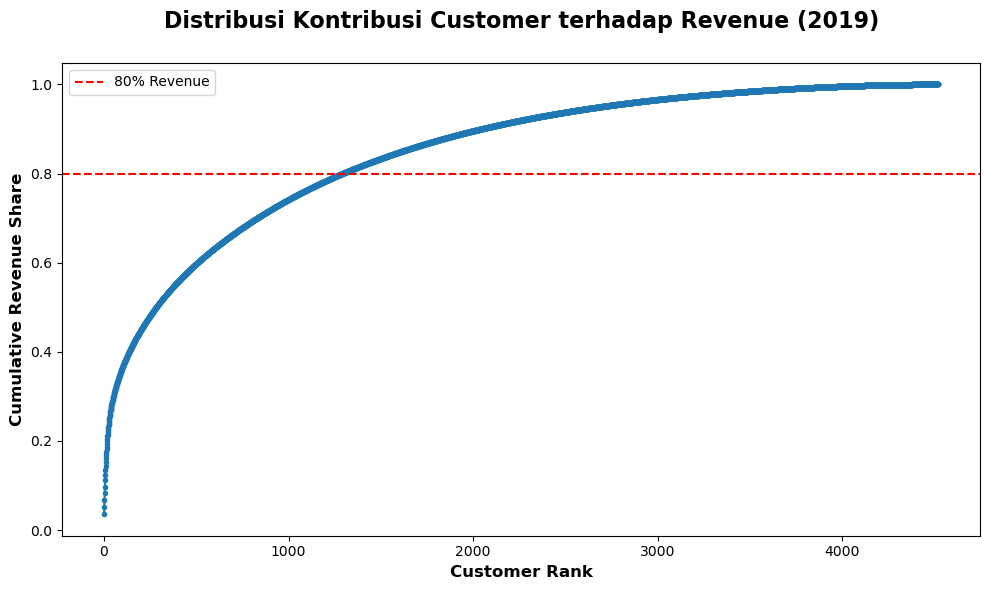

In [30]:
# Hitung kontribusi kumulatif
customer_revenue["CumulativeShare"] = (
    customer_revenue["Revenue"].cumsum() / customer_revenue["Revenue"].sum())

# Plot distribusi
plt.figure(figsize=(10,6))
plt.plot(range(1, len(customer_revenue)+1), customer_revenue["CumulativeShare"], marker=".")
plt.axhline(0.8, color="red", linestyle="--", label="80% Revenue")
plt.title("Distribusi Kontribusi Customer terhadap Revenue (2019)\n",fontsize=16, fontweight='bold')
plt.xlabel("Customer Rank",fontsize=12, fontweight='bold')
plt.ylabel("Cumulative Revenue Share",fontsize=12, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('kontribusi customer .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

Hanya ±20–30% customer menyumbang 80% revenue (high-value customers).

#### 2. Analisis RFM (Perilaku Customer)
Segmentasi Recency, Frequency, Monetary untuk tahu perilaku customer.

In [31]:
# Pastikan Date dalam format datetime
df_filtered_2019["Date"] = pd.to_datetime(df_filtered_2019["Date"])

# Snapshot date = hari terakhir transaksi + 1
snapshot_date = df_filtered_2019["Date"].max() + pd.Timedelta(days=1)

# Hitung RFM metrics
rfm = df_filtered_2019.groupby("CustomerNo").agg({
    "Date": lambda x: (snapshot_date - x.max()).days,   # Recency
    "TransactionNo": "nunique",                         # Frequency
    "Revenue": "sum"                                    # Monetary
}).reset_index()

rfm.rename(columns={"Date":"Recency", "TransactionNo":"Frequency", "Revenue":"Monetary"}, inplace=True)

##### 2.1 Skoring RFM

In [32]:
# Skoring R, F, M (1–5)
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])  # lebih kecil recency → lebih bagus
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

# Gabungkan jadi satu kode RFM
rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score","F_Score","M_Score"]].astype(int).sum(axis=1)

##### 2.2 Kategorisasi Customer

In [33]:
def segment_customer(score):
    if score >= 12:
        return "Champions"
    elif score >= 9:
        return "Loyal Customers"
    elif score >= 6:
        return "Potential Loyalist"
    else:
        return "At Risk"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)

rfm["Segment"].value_counts()

Segment
Champions             1277
Potential Loyalist    1236
Loyal Customers       1131
At Risk                876
Name: count, dtype: int64

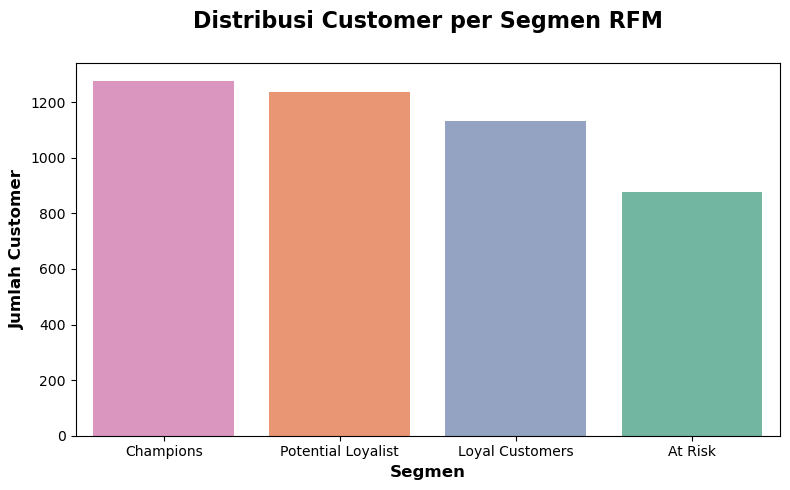

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, hue="Segment", palette="Set2",legend=False)
plt.title("Distribusi Customer per Segmen RFM\n",fontsize=16, fontweight='bold')
plt.xlabel("Segmen",fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Customer",fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('segmentasi customer .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

#### 2.3 Revenue per Segmen RFM

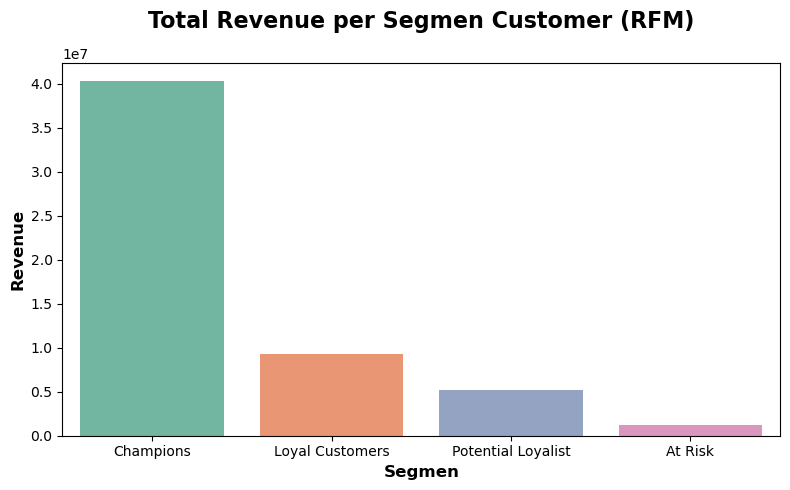

In [35]:
# Hitung total revenue per segmen
segment_revenue = (
    rfm.groupby("Segment")["Monetary"]
    .sum()
    .reset_index()
    .sort_values(by="Monetary", ascending=False)
)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=segment_revenue, x="Segment", y="Monetary",hue="Segment", palette="Set2",legend=False)
plt.title("Total Revenue per Segmen Customer (RFM)\n",fontsize=16, fontweight='bold')
plt.xlabel("Segmen",fontsize=12, fontweight='bold')
plt.ylabel("Revenue",fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('total reenue per customer .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

In [36]:
segment_revenue

,Segment,Monetary
1,Champions,40340760.43
2,Loyal Customers,9232890.58
3,Potential Loyalist,5237749.08
0,At Risk,1224209.45


Proporsi (Pie Chart)

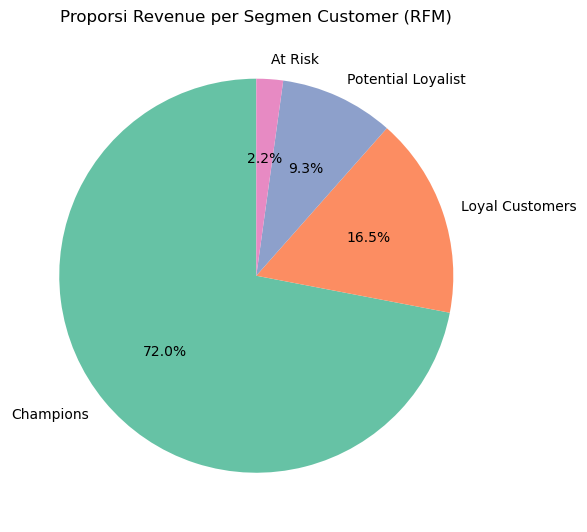

In [37]:
plt.figure(figsize=(6,6))
plt.pie(
    segment_revenue["Monetary"], 
    labels=segment_revenue["Segment"], 
    autopct="%.1f%%", 
    startangle=90, 
    colors=sns.color_palette("Set2")
)
plt.title("Proporsi Revenue per Segmen Customer (RFM)")
plt.tight_layout()
plt.savefig('poporsi reenue per customer .png', facecolor='white', transparent=False) # Simpan sebagai PNG
plt.show()

#### Temuan Utama
1. Champions
- Jumlahnya relatif sama dengan segmen lain (±1.200-an customer).
- Tapi kontribusi revenue sangat dominan (40%+ dari total revenue).
Artinya, mereka punya pembelian lebih besar per transaksi (high AOV) dibanding segmen lain.
2. Loyal Customers
- Jumlahnya cukup besar (sekitar 1.100+).
- Kontribusi revenue ada, tapi jauh di bawah Champions.
- Mungkin sering beli, tapi dengan order kecil → strategi cross-sell atau bundle cocok untuk mereka.
3. Potential Loyalist
- Jumlah cukup banyak (mirip Champions).
- Kontribusi revenue sedang → ini adalah segmen yang harus “naik kelas” menjadi Champions.
- Perlu nurturing lewat loyalty program, diskon khusus, atau rekomendasi produk.
4. At Risk
- Jumlah customer masih signifikan (± 900+).
- Revenue sangat kecil → indikasi banyak customer yang mulai berhenti belanja.
- Butuh strategi re-engagement (email reminder, promo khusus, retargeting).

#### Implikasi Bisnis
1. Revenue sangat bergantung pada segmen Champions → rawan risiko kalau churn.
2. Growth peluang terbesar ada di segmen Potential Loyalist.
3. At Risk harus ditangani dengan kampanye khusus untuk mencegah kehilangan pelanggan.

# Crucial Question

Ini adalah 5 pertanyaan utama yang ditanyakan oleh pembuat dataset sales ini.  
Anda dapat menggunakan analisis yang sudah dikerjakan pada bagian sebelumnya, ataupun melakukan analisis baru untuk menjawab pertanyaan dibawah.

1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?